<a href="https://colab.research.google.com/github/ss20648/CE888/blob/main/Lab%203/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# df=pd.read_csv("bank-additional-full.csv")

df=pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter=";")


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(df.iloc[:, -1].values)

In [6]:
df_dummies=pd.get_dummies(df)
df_dummies.drop('y_no', inplace=True, axis=1)
df_dummies.drop('y_yes', inplace=True, axis=1)
df_dummies.drop('duration', inplace=True, axis=1)
df_dummies.dropna()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


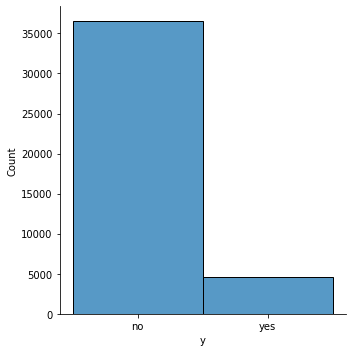

In [7]:
sns.displot(df, x="y")

In [9]:
from collections import Counter
count=Counter(y)

In [10]:
from sklearn.model_selection import train_test_split
X=df_dummies.iloc[:, :].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50, stratify=y)

In [11]:
unique_test, counts_test = np.unique(y_test, return_counts=True)
unique_train, counts_train = np.unique(y_train, return_counts=True)

In [12]:
print(counts_train[1]/counts_train[0])
print(counts_test[1]/counts_test[0])

0.12695806826732334
0.12694938440492476


In [13]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 400, max_depth=6)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, accuracy_score
from sklearn import metrics
scores = cross_val_score(classifier, X_train, y_train, cv=10, scoring="f1")

In [16]:
np.mean(scores)

0.2837755394174718

In [17]:
from sklearn.dummy import DummyClassifier
dummy_clf=DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train,y_train)
dummy_clf.score(X_train,y_train)

0.7979969650986343

In [18]:
dummy_scores = cross_val_score(dummy_clf, X_train, y_train, cv=10, scoring="f1")
print(dummy_scores)
np.mean(dummy_scores)

[0.12583668 0.10723861 0.13454075 0.11598303 0.12145749 0.10752688
 0.09065156 0.11157601 0.10991957 0.09549072]


0.1120221291205378

In [19]:
print("RF Clf score : ",accuracy_score(y_train,classifier.predict(X_train)))
print("Dummy Clf score : ",accuracy_score(y_train, dummy_clf.predict(X_train)))

RF Clf score :  0.9001820940819424
Dummy Clf score :  0.8026100151745068


In [21]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [100, 50], 'max_depth': [3,5],'criterion': ["entropy"]},
              {'n_estimators': [100, 50], 'max_depth': [3], 'criterion': ["gini"]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 89.92 %
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 100}


In [22]:
bestClassifier=RandomForestClassifier(n_estimators=100, max_depth=6)
bestClassifier.fit(X_train,y_train)
accuracy_score(y_train,bestClassifier.predict(X_train))

0.9004855842185129

In [23]:
best_scores = cross_val_score(bestClassifier, X_train, y_train, cv=10, scoring="accuracy")

In [24]:
np.mean(best_scores)

0.8993323216995448

In [25]:
accuracy_score(y_test,bestClassifier.predict(X_test))

0.8997329448895363

In [33]:
imp=grid_search.best_estimator_.feature_importances_
imp

array([2.57716101e-02, 4.35134475e-03, 1.14164422e-01, 2.78652968e-02,
       8.53248162e-02, 5.91339220e-02, 7.54858578e-02, 1.46777067e-01,
       1.87519733e-01, 8.67409081e-04, 2.98773806e-03, 4.70583837e-04,
       3.94262049e-04, 5.50448851e-04, 2.52067310e-03, 6.56220821e-04,
       7.36614459e-04, 3.22054912e-03, 9.14900081e-04, 5.46806299e-04,
       5.78400123e-04, 6.84651180e-04, 1.14290001e-03, 1.55975226e-03,
       2.33100707e-04, 6.85080332e-04, 5.42272542e-04, 1.19916409e-03,
       1.10578040e-03, 6.91024008e-05, 9.00320236e-04, 1.99490419e-03,
       7.09906221e-04, 3.92521125e-03, 3.37698953e-03, 0.00000000e+00,
       8.97445072e-04, 4.34924092e-04, 8.68362680e-04, 8.43592235e-04,
       4.19482286e-04, 8.03899310e-04, 1.26079729e-02, 1.11945138e-02,
       7.11570202e-03, 1.60419363e-03, 1.47308055e-03, 1.29051184e-03,
       4.90998057e-03, 1.76435592e-02, 1.35930596e-02, 1.29276164e-03,
       1.54251612e-02, 5.44387117e-03, 1.17441310e-03, 3.59091702e-03,
      

In [34]:
top_3_idx = np.argsort(imp)[-3:]
top_3_values = [imp[i] for i in top_3_idx]

In [28]:
print(df_dummies.columns.values.tolist()[4])
print(df_dummies.columns.values.tolist()[8])
print(df_dummies.columns.values.tolist()[7])

emp.var.rate
nr.employed
euribor3m


In [29]:
print("Error(test) : ", 1-accuracy_score(y_test, bestClassifier.predict(X_test)))

Error(test) :  0.10026705511046374


In [30]:
accuracy_score(y_test, bestClassifier.predict(X_test))

0.8997329448895363

In [31]:
from sklearn.metrics import f1_score
tempClassifier=RandomForestClassifier(n_estimators=100, max_depth=8, random_state=60)
tempClassifier.fit(X_train,y_train)
f1_score(y_test,tempClassifier.predict(X_test))

0.3360522022838499